In [2]:
from ISLP import load_data

In [3]:
df = load_data("College")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [4]:
df["Private"] = df.Private.apply(lambda x: 1 if x=="Yes" else 0)
df["Accept.Rate"] = df["Accept"] / df["Apps"]
data = df.drop(columns=["Accept", "Apps"])

In [5]:
data

,Private,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,1,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,1,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,1,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,1,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,1,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0.689577
773,1,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0.921388
774,1,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0.913209
775,1,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,0.229145


# part(a)  - Train/Test Split

In [6]:
x_cols = list(data.columns)
x_cols.remove("Accept.Rate")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.loc[:, x_cols].to_numpy(), data["Accept.Rate"].to_numpy(), test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((621, 16), (156, 16), (621,), (156,))

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Part(b) - Fit OLS

In [10]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_sc, Y_train)
y_pred = linear_model.predict(X_test_sc)

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
print(f"RMSE-Test error of this model is {np.sqrt(mean_squared_error(y_true=Y_test, y_pred=y_pred))}")

RMSE-Test error of this model is 0.13789345440675646


# Part (c) - Fitting ridge regression

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alpha = np.arange(0, 2, 0.1)
val_errors = []
for a in alpha:
    ridge_model = Ridge(alpha=a)
    val_errors.append(-cross_val_score(ridge_model, X_train_sc, Y_train, cv=5, scoring="neg_mean_squared_error").mean())

In [13]:
# Every alpha is having a similar validation error, therefore can choose any number for alpha
ridge_model = Ridge(alpha=alpha[np.argmin(val_errors)])
ridge_model.fit(X_train_sc, Y_train)
y_pred = ridge_model.predict(X_test_sc)
print(f"lambda value: {alpha[np.argmin(val_errors)]}")
print(f"RMSE-Test error of this model is {np.sqrt(mean_squared_error(y_true=Y_test, y_pred=y_pred))}")

lambda value: 1.9000000000000001
RMSE-Test error of this model is 0.13789507514743632


# Part (d) - Fitting Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
alpha = 10 ** np.linspace(8, -2)/Y_train.std()
val_errors = []
for a in alpha:
    lasso_model = Lasso(alpha=a, tol=1e-100)
    val_errors.append(-cross_val_score(lasso_model, X_train_sc, Y_train, cv=5, scoring="neg_mean_squared_error").mean())

/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.776e-15, tolerance: 1.050e-99
  model = cd_fast.enet_coordinate_descent(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.776e-15, tolerance: 1.072e-99
  model = cd_fast.enet_coordinate_descent(


In [15]:
lasso_model = Lasso(alpha=alpha[np.argmin(val_errors)])
lasso_model.fit(X_train_sc, Y_train)
y_pred = lasso_model.predict(X_test_sc)
print(f"lambda value: {alpha[np.argmin(val_errors)]}")
print(f"RMSE-Test error of this model is {np.sqrt(mean_squared_error(y_true=Y_test, y_pred=y_pred))}")
print(f"number of non-zero coefficients are {len(np.where(lasso_model.coef_ != 0)[0])}")

lambda value: 0.0696874833684902
RMSE-Test error of this model is 0.1601563633441534
number of non-zero coefficients are 1


## Test error of Lasso and Ridge regression aren't similar, by including more components, a greater amount of information is preserved in the ridge-regression space, which can be beneficial for modeling.


# Part (e) - Partial Least Squares Regression

In [16]:
from sklearn.cross_decomposition import PLSRegression
num_components = np.arange(1, 17)
val_errors = []
for n in num_components:
    pls_model = PLSRegression(n_components=n)
    val_errors.append(cross_val_score(pls_model, X_train_sc, Y_train, cv=3).mean())

In [17]:
pls_model = PLSRegression(n_components=num_components[np.argmin(val_errors)])
pls_model.fit(X_train_sc, Y_train)
y_pred = pls_model.predict(X_test_sc)
print(f"RMSE-Test error of this model is {np.sqrt(mean_squared_error(y_true=Y_test, y_pred=y_pred))}")
print(f"number of components - {5}")

RMSE-Test error of this model is 0.1418844485597218
number of components - 5


# part (f) Forward Stepwise Selection

In [78]:
n = len(X_train_sc[0])
cols = np.arange(0, n)
best_subset = []
best_model = None
val_error = float('inf')
val_errors = []
counter = 0
while counter < n:
    rem = list(set(cols) - set(best_subset))
    train_error = float('inf')
    local_set = []
    model = LinearRegression()
    for fe in rem:
        m = list(best_subset)
        m.append(fe)
        model.fit(X_train_sc[:, m], Y_train)
        error = mean_squared_error(model.predict(X_train_sc[:, m]), Y_train)
        if train_error > error:
            local_set = m
            train_error = error
    if local_set:
        best_subset = local_set
    bm = LinearRegression()
    ve = cross_val_score(bm, X_train_sc[:, best_subset], Y_train).mean()
    val_errors.append(ve)
    if ve < val_error:
        best_model = best_subset
        val_error = ve
    counter += 1

In [79]:
print(len(best_model), best_model)

1 [2]


In [80]:
best_subset

[2, 0, 7, 8, 15, 1, 14, 6, 12, 5, 9, 13, 10, 3, 11, 4]

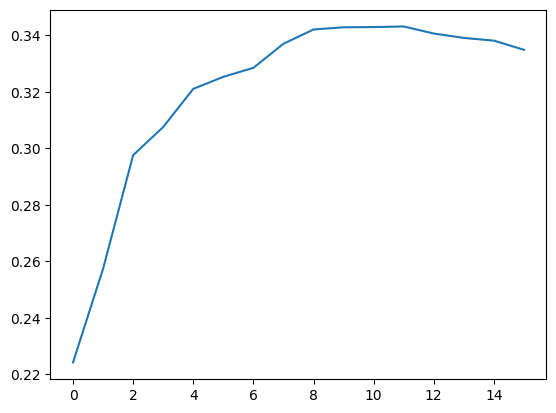

In [81]:
import matplotlib.pyplot as plt

plt.plot(list(cols), val_errors)

In [82]:
import pandas as pd
new_df = pd.concat([data[data.columns[best_model]], df["Accept.Rate"]], axis=1)

In [83]:
new_df.corr()

,Top10perc,Accept.Rate
Top10perc,1.000000,-0.478675
Accept.Rate,-0.478675,1.000000


# Number of features obtained is 1 and this is equal to the non-zero coefficients of obtained using Lasso Regression. This may not be the global best subset because the best subset may not include the predictor we have obtained in the initial run and therefore we can never get the best subset of predictors.